In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df =  pd.read_csv('/Users/macbook/Downloads/supermarket_sales - Sheet1.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df['Product line'] = df['Product line'].astype('category')
df['Branch'] = df['Branch'].astype('category')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   category      
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   category      
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [26]:
Product_line = df.groupby('Product line',observed=False)['gross income'].sum().reset_index()
Product_line_profits = Product_line.sort_values(by='gross income',ascending=False)
Product_line_profits

,Product line,gross income
2,Food and beverages,2673.5640
5,Sports and travel,2624.8965
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
3,Health and beauty,2342.5590


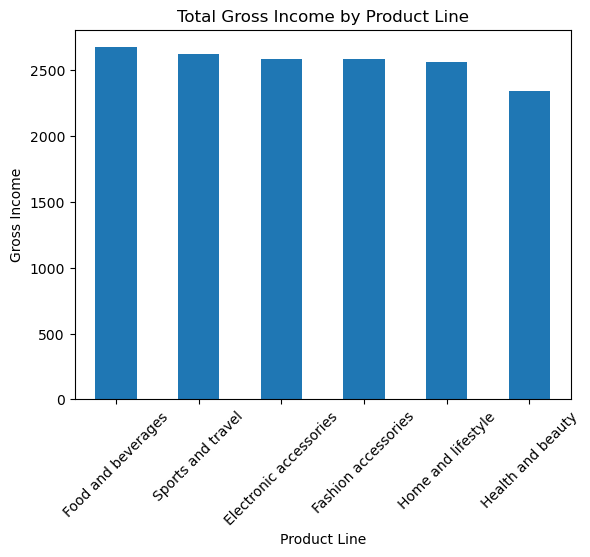

In [37]:
Product_line_profits.plot(kind='bar', x='Product line', y='gross income', legend=False)
plt.title('Total Gross Income by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Gross Income')
plt.xticks(rotation=45)  
plt.show()

In [40]:
Branch = df.groupby('Branch',observed=False)['gross income'].sum().reset_index()
Branch_profits = Branch.sort_values(by='gross income',ascending=False)
Branch_profits

,Branch,gross income
2,C,5265.1765
0,A,5057.1605
1,B,5057.0320


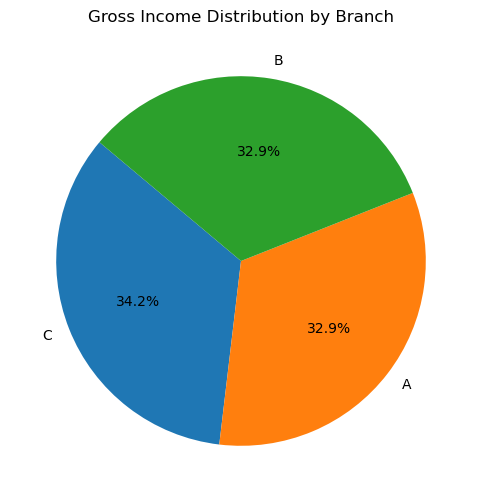

In [41]:
plt.figure(figsize=(10, 6))
plt.pie(Branch_profits['gross income'], labels=Branch_profits['Branch'], autopct='%1.1f%%', startangle=140)
plt.title('Gross Income Distribution by Branch')
plt.show()


In [43]:
payments = df.groupby('Payment',observed=False)['gross income'].sum().reset_index()
payments_methods = payments.sort_values(by='gross income',ascending=False)
payments_methods

,Payment,gross income
0,Cash,5343.170
2,Ewallet,5237.767
1,Credit card,4798.432


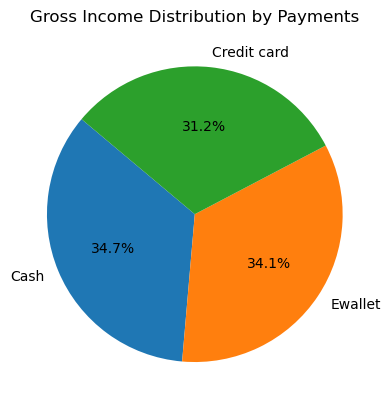

In [50]:
plt.pie(payments_methods['gross income'], labels=payments_methods['Payment'], autopct='%1.1f%%', startangle=140)
plt.title('Gross Income Distribution by Payments')
plt.show()

In [52]:
customer_type = df.groupby('Customer type')['gross income'].sum().reset_index()
customer_type_income = customer_type.sort_values(by='gross income',ascending=False)
customer_type_income

,Customer type,gross income
0,Member,7820.164
1,Normal,7559.205


(array([0, 1]), [Text(0, 0, 'Member'), Text(1, 0, 'Normal')])

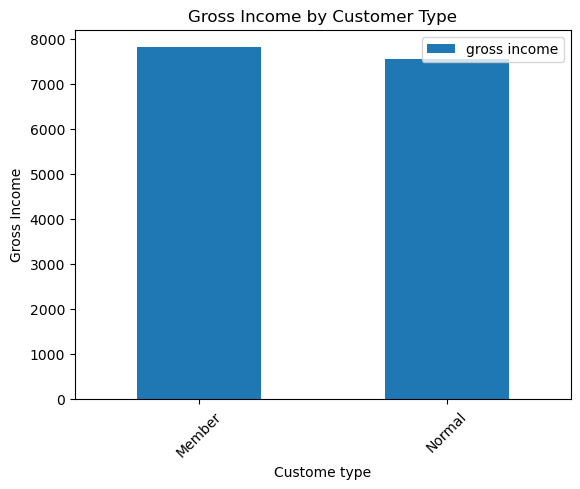

In [63]:
customer_type_income.plot(kind='bar',x='Customer type',y='gross income')
plt.title('Gross Income by Customer Type')
plt.xlabel('Custome type')
plt.ylabel('Gross Income')
plt.xticks(rotation=45)

In [82]:
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()

In [80]:
df['Month']

0       January
1         March
2         March
3       January
4      February
         ...   
995     January
996       March
997    February
998    February
999    February
Name: Month, Length: 1000, dtype: object

In [83]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Weekday,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January,Saturday,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March,Friday,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March,Sunday,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January,Sunday,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February,Friday,Friday


In [87]:
month = df.groupby('Month')['gross income'].sum().reset_index()
monthly_income = month.sort_values(by='gross income',ascending=False)
monthly_income

,Month,gross income
1,January,5537.708
2,March,5212.167
0,February,4629.494


Text(0.5, 0, 'Months')

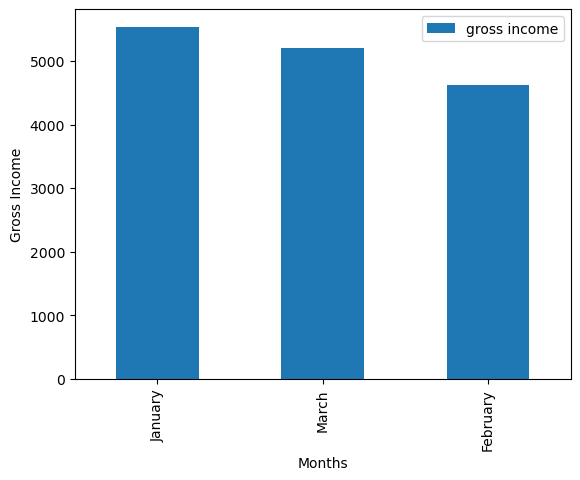

In [90]:
monthly_income.plot(kind='bar',x='Month',y='gross income')
plt.ylabel('Gross Income')
plt.xlabel('Months')

In [91]:
Days = df.groupby('Day')['gross income'].sum().reset_index()
Daily_income = Days.sort_values(by='gross income',ascending=False)
Daily_income

,Day,gross income
2,Saturday,2672.4195
5,Tuesday,2451.5355
4,Thursday,2159.4880
3,Sunday,2117.0425
0,Friday,2091.7305
6,Wednesday,2082.4350
1,Monday,1804.7180


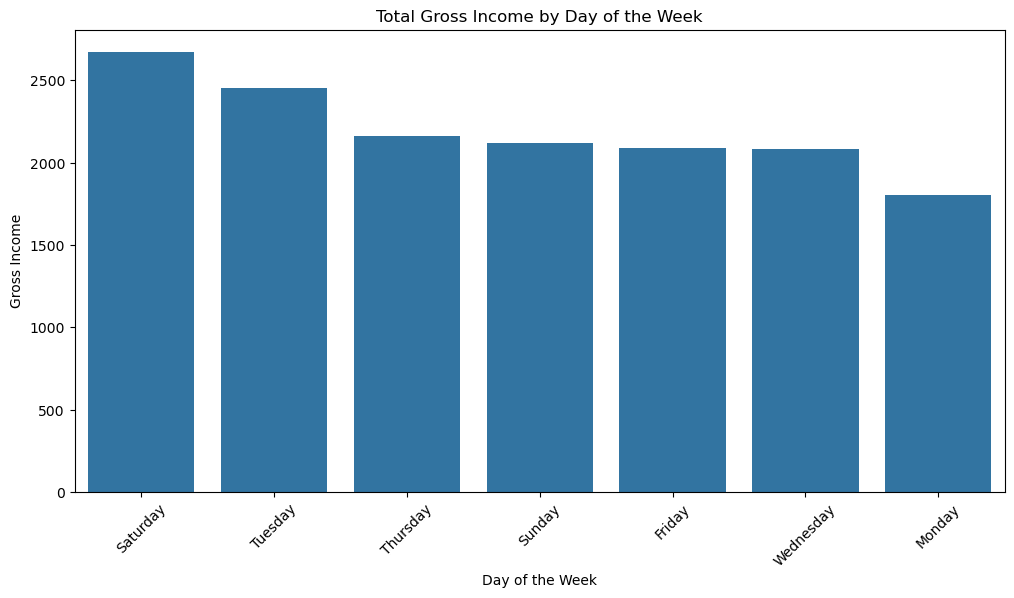

In [95]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Day', y='gross income', data=Daily_income)
plt.title('Total Gross Income by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Gross Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()